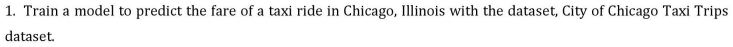

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Taxi_Trips.csv")

Saving Taxi_Trips.csv to Taxi_Trips.csv


In [6]:
df = df[['Trip Seconds', 'Trip Miles', 'Tips', 'Tolls', 'Extras', 'Fare']].dropna()

X = df[['Trip Seconds', 'Trip Miles', 'Tips', 'Tolls', 'Extras']]
y = df['Fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results = pd.DataFrame({
    'Actual Fare': y_test.values,
    'Predicted Fare': y_pred
})


print(results.head(10))

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

   Actual Fare  Predicted Fare
0        32.25       35.939489
1        17.75       23.977803
2        47.00       52.712953
3        38.75       21.025521
4        42.25       48.040469
5        24.00       29.670471
6        31.75       33.432281
7        10.00       18.098640
8        34.50       35.960603
9        34.50       19.038483

Mean Squared Error (MSE): 61.58
R² Score: 0.66
